In [1]:
customer_df = read.csv('Wholesale_customers_data.csv')
customer_df$Channel <- NULL
customer_df$Region <- NULL
dim(customer_df)

[1] 440   6

In [2]:
library(dplyr, warn.conflicts = FALSE)
library(moments)

ERROR: Error in library(moments): there is no package called ‘moments’


In [ ]:
 customer_samp_df = sample_n(customer_df, 5)

In [3]:
stats = data.frame(feature=colnames(customer_samp_df))
stats['mean_'] = sapply(customer_samp_df, mean)
stats['sd_'] = sapply(customer_samp_df, sd)
stats['skewness_'] = sapply(customer_samp_df, skewness)
stats['kurtosis_'] = sapply(customer_samp_df, kurtosis)
stats

ERROR: Error in is.data.frame(x): object 'customer_samp_df' not found


In [4]:
stats = data.frame(feature=colnames(customer_df))
stats['mean_'] = sapply(customer_df, mean)
stats['sd_'] = sapply(customer_df, sd)
stats['skewness_'] = sapply(customer_df, skewness)
stats['kurtosis_'] = sapply(customer_df, kurtosis)
stats

ERROR: Error in match.fun(FUN): object 'skewness' not found


---

# MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

You are already familiar with standardization.

## $$Z = \frac{X-\mu}{\sigma}$$

In [5]:
customer_sc_df = data.frame(scale(customer_df))

In [6]:
stats_sc = data.frame(feature=colnames(customer_sc_df))
stats_sc['mean_'] = sapply(customer_sc_df, mean)
stats_sc['sd_'] = sapply(customer_sc_df, sd)
stats_sc['skewness_'] = sapply(customer_sc_df, skewness)
stats_sc['kurtosis_'] = sapply(customer_sc_df, kurtosis)
stats_sc

ERROR: Error in match.fun(FUN): object 'skewness' not found


In [7]:
library(ggplot2)

In [8]:
head(customer_df)

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
12669,9656,7561,214,2674,1338
7057,9810,9568,1762,3293,1776
6353,8808,7684,2405,3516,7844
13265,1196,4221,6404,507,1788
22615,5410,7198,3915,1777,5185
9413,8259,5126,666,1795,1451


In [9]:
library(repr)
options(repr.plot.width=10, repr.plot.height=2) 

In [10]:
source('multiplot.r')

In [11]:
original_v_scaled <- function (feature) {
    original_feature <- as.vector(customer_df[[feature]])
    scaled_feature <- as.vector(customer_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    multiplot(p1, p2, cols=2)
}


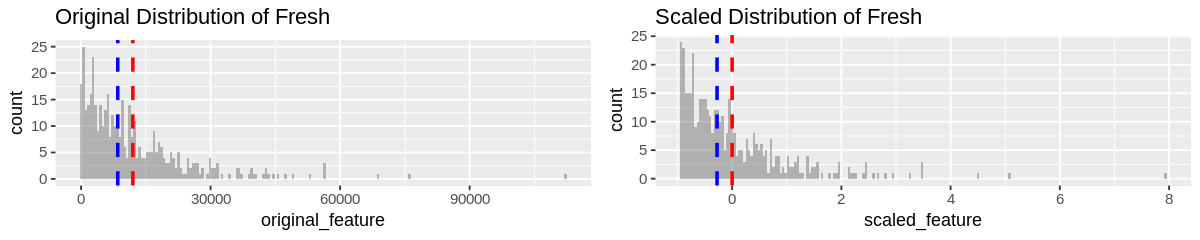

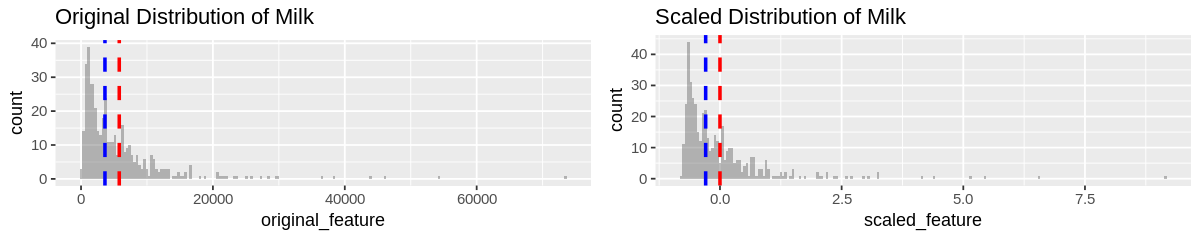

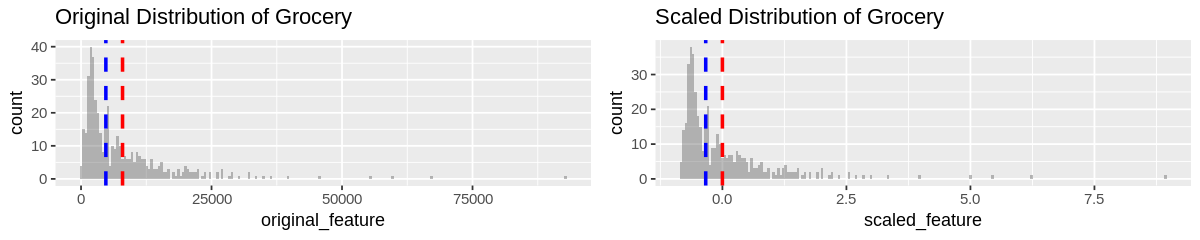

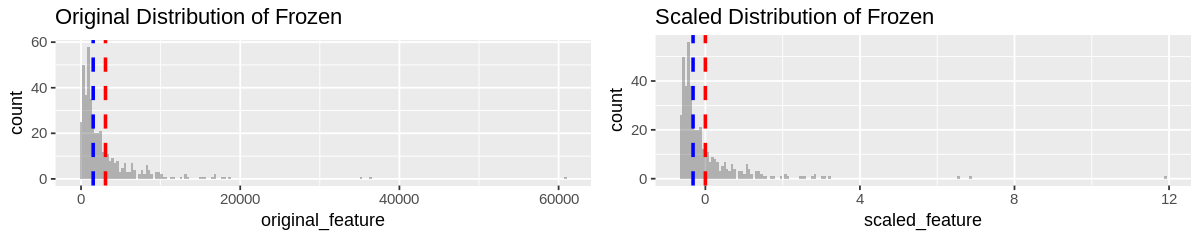

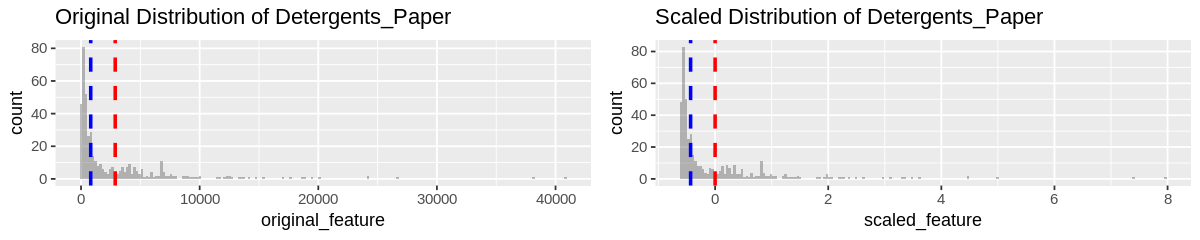

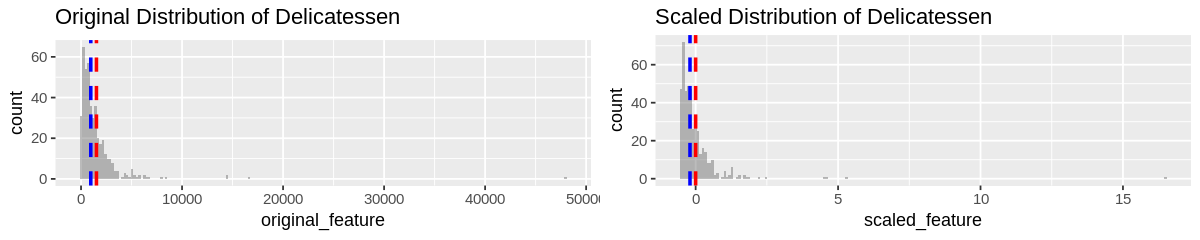

In [12]:
original_v_scaled('Fresh')
original_v_scaled('Milk')
original_v_scaled('Grocery')
original_v_scaled('Frozen')
original_v_scaled('Detergents_Paper')
original_v_scaled('Delicatessen')

## MANY OF THE TOOLS WE WILL USE WILL ASSUME NORMAL DATA

---

# Deskew the Data

We will look at two common approaches to deskewing data:

- the log transform
- scaling by the Box-Cox test

For purposes of comparison, we will keep both transforms.

We have previously looked at scaling data as a preprocessing step. Note that scaling of data will have no effect on its skewness. 

Another way we can verify this is via a test of skewness.

To perform this test we can use the `scipy.stats.skewtest`.

This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution. Remember, a low p-value means reject the null hypothesis i.e the data is skewed!


In [14]:
skewness_ = data.frame(feature=colnames(customer_sc_df))
skewness_['skew_'] = sapply(customer_df, skewness)
skewness_['skew_sc'] = sapply(customer_sc_df, skewness)
skewness_

ERROR: Error in match.fun(FUN): object 'skewness' not found


## Deskew by taking the log of the data

Many times the skew of data can be easily removed by taking the log of the data. Let's do so here.

We will then scale the data after deskewing.

In [15]:
customer_log_df = log(customer_df)
customer_log_sc_df = data.frame(scale(customer_log_df))

In [16]:
skewness_['skew_log_'] = sapply(customer_log_df, skewness)
skewness_['skew_log_sc'] = sapply(customer_log_sc_df, skewness)
skewness_

ERROR: Error in match.fun(FUN): object 'skewness' not found


In [17]:
original_v_scaled_v_log <- function (feature) {
    original_feature <- as.vector(customer_df[[feature]])
    scaled_feature <- as.vector(customer_sc_df[[feature]])
    log_feature <- as.vector(customer_log_df[[feature]])
    log_scaled_feature <- as.vector(customer_log_sc_df[[feature]])
    p1 <- qplot(original_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(original_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(original_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Original Distribution of", feature))
    p2 <- qplot(scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Scaled Distribution of", feature))  
    p3 <- qplot(log_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_feature)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste("Log Distribution of", feature))
    p4 <- qplot(log_scaled_feature, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(log_scaled_feature)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(log_scaled_feature)), color="blue", linetype="dashed", size=1)  +
        ggtitle(paste("Log Scaled Distribution of", feature))  
    multiplot(p1, p2, p3, p4, cols=4)
}



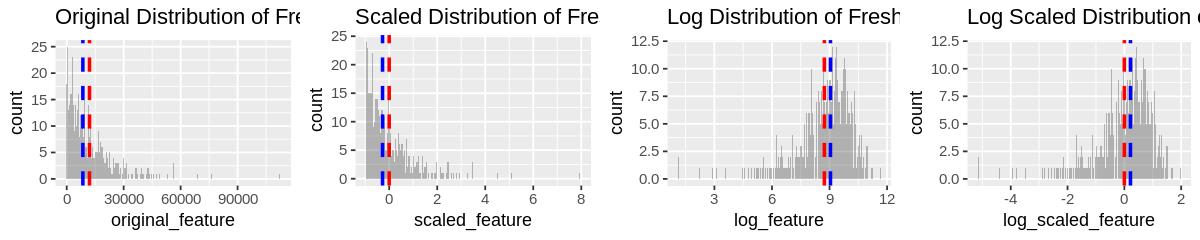

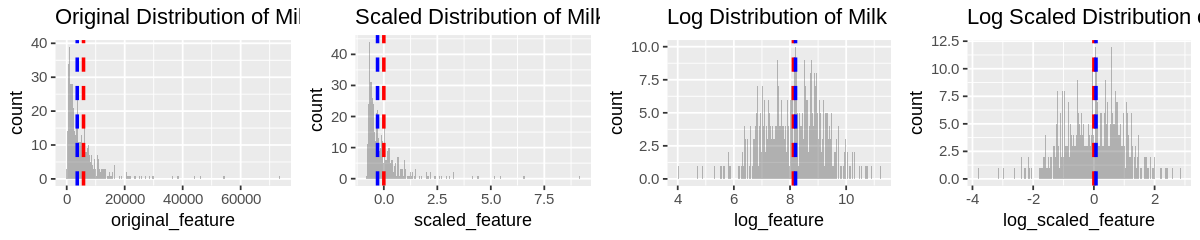

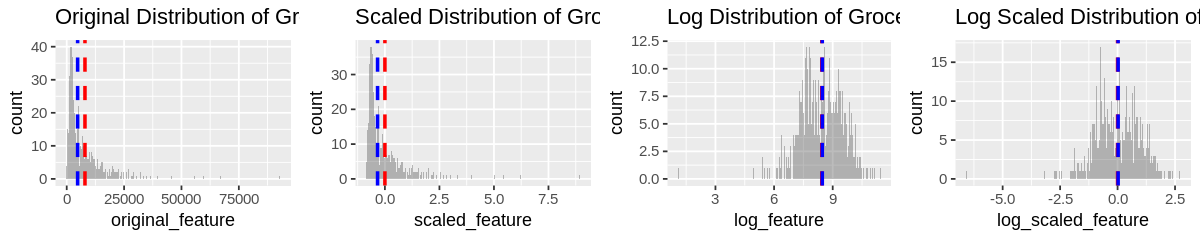

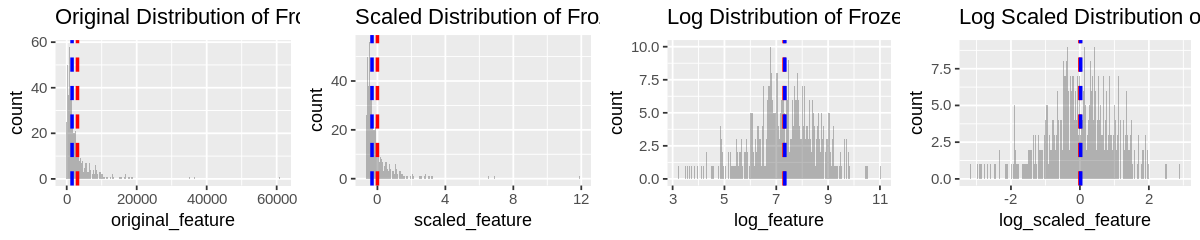

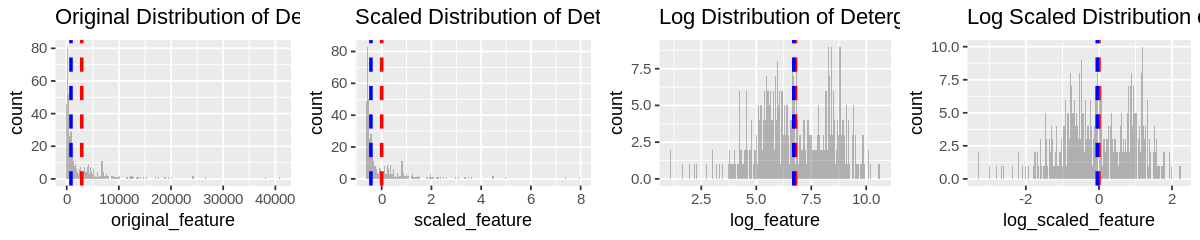

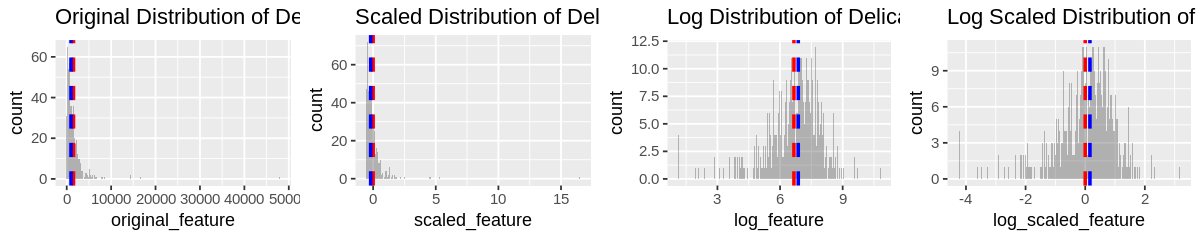

In [18]:
original_v_scaled_v_log('Fresh')
original_v_scaled_v_log('Milk')
original_v_scaled_v_log('Grocery')
original_v_scaled_v_log('Frozen')
original_v_scaled_v_log('Detergents_Paper')
original_v_scaled_v_log('Delicatessen')